In [62]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [63]:
from datasets import load_dataset
df = load_dataset("fancyzhx/yelp_polarity")
df

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 560000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 38000
    })
})

In [64]:
train_dataset = df['train']
test_dataset = df['test']

In [65]:
df_pandas = test_dataset.to_pandas()

In [66]:
df_pandas

,text,label
0,"Contrary to other reviews, I have zero complai...",1
1,Last summer I had an appointment to get new ti...,0
2,"Friendly staff, same starbucks fair you get an...",1
3,The food is good. Unfortunately the service is...,0
4,Even when we didn't have a car Filene's Baseme...,1
...,...,...
37995,If I could give 0...I would. Don't do it.,0
37996,Items Selected:\nChocolate Cinnamon Horn\nSmal...,1
37997,Expensive lunch meals. Fried pickles were goo...,0
37998,Highly overpriced and food was cold. Our waitr...,0


In [73]:
df_pandas.isna().sum()

text     0
label    0
dtype: int64

In [67]:
import spacy
from tqdm import tqdm

# Muat model bahasa Inggris dari spaCy
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])  # Nonaktifkan NER dan parser
additional_stopwords = {'Mister', 'Mam', 'night'}
nlp.Defaults.stop_words |= additional_stopwords


def clean_text(text):
    # Proses teks dengan spaCy
    doc = nlp(text)
    
    # Tokenisasi dan filter stopwords serta tanda baca
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    
    # Lemmatization (pengembalian kata ke bentuk dasar)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Gabungkan kembali token menjadi teks
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text


In [68]:
# Tambahkan progress bar dengan tqdm
tqdm.pandas(desc="Cleaning Testing Text")  # Progress bar untuk DataFrame testing
df_pandas['text'] = df_pandas['text'].progress_apply(clean_text)

Cleaning Testing Text: 100%|██████████| 38000/38000 [05:03<00:00, 125.23it/s]


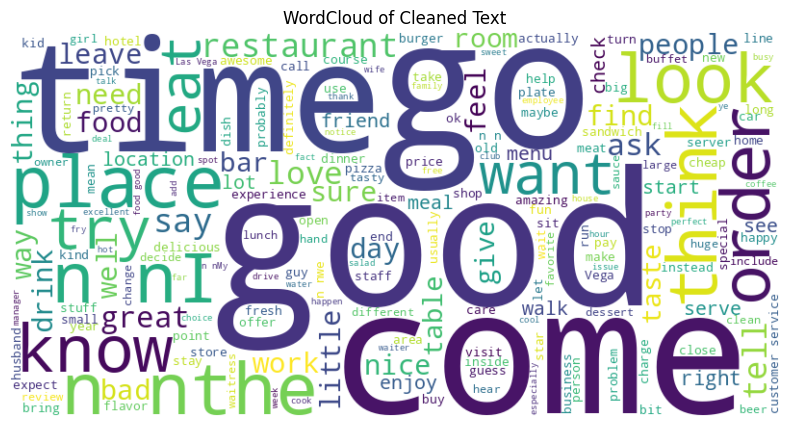

In [70]:
all_cleaned_text = ' '.join(df_pandas['text'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_cleaned_text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Sembunyikan sumbu
plt.title("WordCloud of Cleaned Text")
plt.show()

In [71]:
length = len(df_pandas)
q80 = int(length * .8)
train_df = df_pandas[:q80]
test_df = df_pandas[q80:]

In [72]:
train_df.to_csv("train.csv", index=False)
test_df.to_csv("test.csv", index=False)